In [78]:
import random
import Queue
import operator
import matplotlib.pyplot as plt

N = 100
k = 10
r = 12

random.seed()

adjList = [set() for i in range(N)]
lmap = {}
lcount = {}

def generateRRG():
    freePorts = N*r
    lid = 0
    iter = 0
    while(freePorts > 1 and iter < 5*N*r):
        iter += 1
        available = [i for i in range(N) if len(adjList) != r]
        tup = random.sample(available, 2)
        s1 = tup[0]
        s2 = tup[1]
        # print s1, s2, freePorts, iter

        # check for present link or unavailable free ports
        if(s1 == s2):
            continue
        if(s1 in adjList[s2]):
            continue
        if(len(adjList[s1]) == r or len(adjList[s2]) == r):
            continue

        # Add link
        lmap[(s1,s2)] = lid
        lid+=1
        adjList[s1].add(s2)
        lmap[(s2, s1)] = lid
        adjList[s2].add(s1)
        lid+=1
        freePorts = freePorts - 2

# fills the adjlist
generateRRG()
k = [len(i) for i in adjList]
k_ = sum(k)
print k_
while(k_ < N*r-1):
    adjList = [set() for i in range(N)]
    lmap = {}
    generateRRG()
    k = [len(i) for i in adjList]
    k_ = sum(k)
    print k_

reverse_lmap = {}
for i in lmap:
    reverse_lmap[lmap[i]] = i

1198
1196
1190
1192
1200


In [79]:
for i in lmap:
    lcount[lmap[i]] = 0

def run_bfs(switch, PATH_COUNT):
    visited = [False for i in range(N)]
    visited[switch] = True

    parents = [[] for i in range(N)]

    paths = [[] for i in range(N)]
    paths[switch]= [[switch]]

    level = {}
    level[switch] = 0

    q = Queue.Queue()
    q.put(switch)

    # create bfs
    while(q.qsize() > 0):
        node = q.get()
        level_ = level[node]
        for child in adjList[node]:
            if visited[child] == False:
                q.put(child)
                parents[child].append(node)
                level[child] = level_+1
                visited[child] = True
                for n_paths in paths[node]:
                    paths[child].append(n_paths + [child])
            elif level[child] == level_ + 1: # multiple paths
                parents[child].append(node)
                for n_paths in paths[node]:
                    paths[child].append(n_paths + [child])

    for i in range(N):
        # print i, parents[i], paths[i]
        if i == switch:
            continue
        # select paths randomly for the ECMP routing
        paths[i] = random.sample(paths[i], min(len(paths[i]), PATH_COUNT))
        for path in paths[i]:
            for i in range(1, len(path)):
                src = path[i-1]
                dst = path[i]
                lcount[lmap[(src, dst)]] += 1


for i in range(N):
    # print "RUNNING:", i
    run_bfs(i, 8)


sorted_lcount = sorted(lcount.items(), key=operator.itemgetter(1))
# for i in sorted_lcount:
#     print i[1], reverse_lmap[i[0]]

plot_x8 = []
plot_y8 = []

for i in range(len(sorted_lcount)):
    plot_x8.append(i+1)
    plot_y8.append(sorted_lcount[i][1])

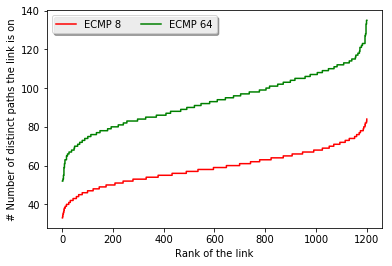

In [80]:
for i in lmap:
    lcount[lmap[i]] = 0

for i in range(N):
    run_bfs(i, 64)


sorted_lcount = sorted(lcount.items(), key=operator.itemgetter(1))
# for i in sorted_lcount:
#     print i[1], reverse_lmap[i[0]]

plot_x64 = []
plot_y64 = []

for i in range(len(sorted_lcount)):
    plot_x64.append(i+1)
    plot_y64.append(sorted_lcount[i][1])

plt.plot(plot_x8, plot_y8, ls='solid', drawstyle='steps-post', label='ECMP 8', color='red')
plt.plot(plot_x64, plot_y64, ls='solid', drawstyle='steps-post', label='ECMP 64', color='green')
plt.legend(loc='upper left', ncol=2, mode="shrink", shadow=True, fancybox=True)
plt.xlabel('Rank of the link')
plt.ylabel('# Number of distinct paths the link is on')
plt.savefig('fig%d.png'%(N,), bbox_inches='tight')
plt.show()

In [35]:
print len(lmap)

480
